In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the university ranking data
file_path = '/Users/yonathanciotta/Downloads/cleaned_cwurData.pkl'
df = pd.read_pickle(file_path)

In [3]:
# Display the first few rows of the dataframe
print(df.head())

     world_rank                            institution country  national_rank  \
200           1                     Harvard University     usa              1   
201           2                    Stanford University     usa              2   
202           3  Massachusetts Institute of Technology     usa              3   
203           4                University of Cambridge      uk              1   
204           5                   University of Oxford      uk              2   

     quality_of_education  alumni_employment  quality_of_faculty  \
200                     1                  1                   1   
201                    11                  2                   4   
202                     3                 11                   2   
203                     2                 10                   5   
204                     7                 12                  10   

     publications  influence  citations  broad_impact  patents   score  \
200             1          1  

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


In [5]:
# Check data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
world_rank                       int64
institution                     object
country                         object
national_rank                    int64
quality_of_education             int64
alumni_employment                int64
quality_of_faculty               int64
publications                     int64
influence                        int64
citations                        int64
broad_impact                   float64
patents                          int64
score                          float64
year                    datetime64[ns]
dtype: object


In [6]:
# Identify unique country names
unique_countries = df['country'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['usa' 'uk' 'japan' 'switzerland' 'israel' 'south korea' 'canada' 'france'
 'russia' 'china' 'taiwan' 'sweden' 'singapore' 'denmark' 'germany'
 'netherlands' 'italy' 'belgium' 'australia' 'finland' 'norway'
 'south africa' 'spain' 'brazil' 'hong kong' 'ireland' 'austria'
 'new zealand' 'portugal' 'thailand' 'czech republic' 'malaysia' 'india'
 'greece' 'mexico' 'hungary' 'argentina' 'turkey' 'poland' 'saudi arabia'
 'chile' 'iceland' 'slovenia' 'estonia' 'lebanon' 'croatia' 'colombia'
 'slovak republic' 'iran' 'egypt' 'serbia' 'bulgaria' 'lithuania' 'uganda'
 'united arab emirates' 'uruguay' 'cyprus' 'romania' 'puerto rico']


In [7]:
# Display the information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   world_rank            2000 non-null   int64         
 1   institution           2000 non-null   object        
 2   country               2000 non-null   object        
 3   national_rank         2000 non-null   int64         
 4   quality_of_education  2000 non-null   int64         
 5   alumni_employment     2000 non-null   int64         
 6   quality_of_faculty    2000 non-null   int64         
 7   publications          2000 non-null   int64         
 8   influence             2000 non-null   int64         
 9   citations             2000 non-null   int64         
 10  broad_impact          2000 non-null   float64       
 11  patents               2000 non-null   int64         
 12  score                 2000 non-null   float64       
 13  year                 

In [8]:
# Check for missing values
print(df.isnull().sum())

# Drop rows or columns with missing values if necessary
df = df.dropna()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Display the first few rows of the numeric dataframe
print(numeric_df.head())

     world_rank  national_rank  quality_of_education  alumni_employment  \
200           1              1                     1                  1   
201           2              2                    11                  2   
202           3              3                     3                 11   
203           4              1                     2                 10   
204           5              2                     7                 12   

     quality_of_faculty  publications  influence  citations  broad_impact  \
200                   1             1          1          1           1.0   
201                   4             5          3          3           4.0   
202                   2            15          2          2           2.0   
203                   5            10          9         12          13.0   
204                  10            11         12         11          12.0   

     patents   score  
200        2  100.00  
201        6   99.09  
202        1   98

In [18]:

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)
print(scaled_df.head())

   world_rank  national_rank  quality_of_education  alumni_employment  \
0   -1.730320      -0.777042             -2.761099          -2.236277   
1   -1.726856      -0.758326             -2.667502          -2.230457   
2   -1.723391      -0.739610             -2.742379          -2.178080   
3   -1.719927      -0.777042             -2.751739          -2.183900   
4   -1.716463      -0.758326             -2.704941          -2.172261   

   quality_of_faculty  publications  influence  citations  broad_impact  \
0           -3.629116     -1.730459  -1.731998  -1.792802     -1.728091   
1           -3.571853     -1.716599  -1.725059  -1.784804     -1.717633   
2           -3.610028     -1.681949  -1.728529  -1.788803     -1.724605   
3           -3.552765     -1.699274  -1.704243  -1.748816     -1.686257   
4           -3.457326     -1.695809  -1.693835  -1.752814     -1.689743   

    patents     score  
0 -1.804285  8.033673  
1 -1.788874  7.895560  
2 -1.808137  7.834851  
3 -1.627062  7

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

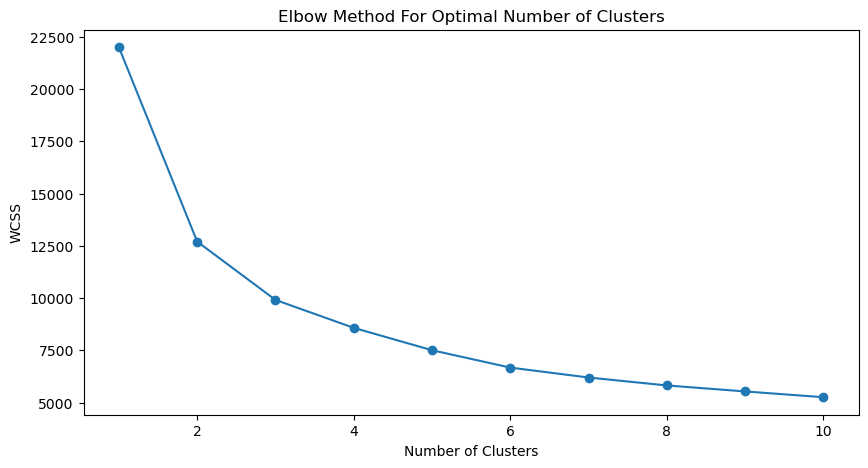

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


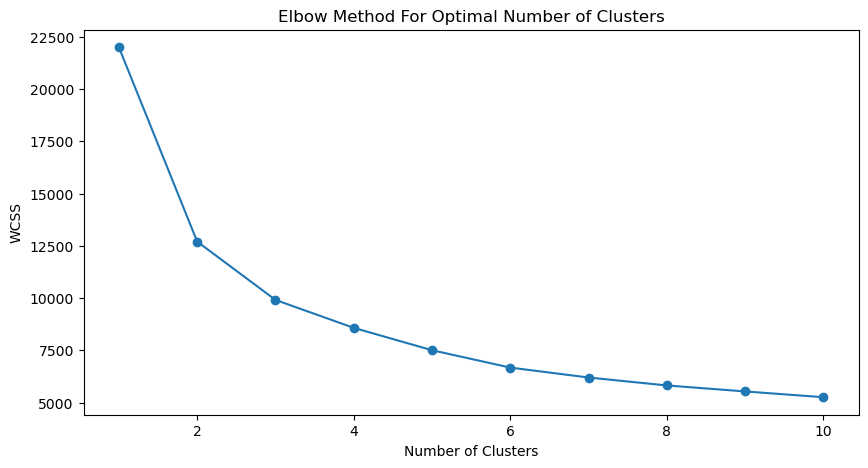

In [22]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Fit the K-means model with the optimal number of clusters (assuming k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Add the cluster labels to the numeric dataframe
numeric_df['Cluster'] = df['Cluster']

# Group the numeric data by clusters and calculate mean values
cluster_centers = numeric_df.groupby('Cluster').mean()
print(cluster_centers)





         world_rank  national_rank  quality_of_education  alumni_employment  \
Cluster                                                                       
0        747.373984      53.593496            343.825203         460.989837   
1         84.434783      18.391304            100.840580         187.445652   
2        327.405405      36.789189            305.198649         358.348649   

         quality_of_faculty  publications   influence   citations  \
Cluster                                                             
0                212.994919    742.975610  733.664634  641.341463   
1                 82.702899    106.891304   95.144928  101.956522   
2                202.489189    324.648649  340.881081  323.598649   

         broad_impact     patents      score  
Cluster                                       
0          740.758130  613.560976  44.490528  
1          102.536232  176.884058  57.843442  
2          319.179730  389.294595  46.475392  


In [27]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Add the cluster labels to the numeric dataframe
numeric_df['Cluster'] = df['Cluster']

# Group the numeric data by clusters and calculate mean values
cluster_centers = numeric_df.groupby('Cluster').mean()
print(cluster_centers)


         world_rank  national_rank  quality_of_education  alumni_employment  \
Cluster                                                                       
0        747.373984      53.593496            343.825203         460.989837   
1         84.434783      18.391304            100.840580         187.445652   
2        327.405405      36.789189            305.198649         358.348649   

         quality_of_faculty  publications   influence   citations  \
Cluster                                                             
0                212.994919    742.975610  733.664634  641.341463   
1                 82.702899    106.891304   95.144928  101.956522   
2                202.489189    324.648649  340.881081  323.598649   

         broad_impact     patents      score  
Cluster                                       
0          740.758130  613.560976  44.490528  
1          102.536232  176.884058  57.843442  
2          319.179730  389.294595  46.475392  


In [33]:
# Analyze clusters by examining cluster centers (mean values)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_df.columns)
cluster_centers = cluster_centers.iloc[:, :-1]  # Exclude the last column if it's not needed
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
   world_rank  national_rank  quality_of_education  alumni_employment  \
0  747.373984      53.593496            343.825203         460.989837   
1   84.434783      18.391304            100.840580         187.445652   
2  327.405405      36.789189            305.198649         358.348649   

   quality_of_faculty  publications   influence   citations  broad_impact  \
0          212.994919    742.975610  733.664634  641.341463    740.758130   
1           82.702899    106.891304   95.144928  101.956522    102.536232   
2          202.489189    324.648649  340.881081  323.598649    319.179730   

      patents  
0  613.560976  
1  176.884058  
2  389.294595  


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset
file_path = '/Users/yonathanciotta/Downloads/cleaned_cwurData.pkl'
df = pd.read_pickle(file_path)

# Check for missing values and handle them if necessary
print(df.isnull().sum())
df = df.dropna()

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Standardize the numeric data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Based on the elbow curve, choose the optimal number of clusters
k = 3

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Analyze clusters by examining cluster centers (mean values)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_df.columns)
cluster_centers = cluster_centers.iloc[:, :-1]  # Exclude the last column if it's not needed
print("Cluster Centers:")
print(cluster_centers)


world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Cluster Centers:
   world_rank  national_rank  quality_of_education  alumni_employment  \
0  747.373984      53.593496            343.825203         460.989837   
1   84.434783      18.391304            100.840580         187.445652   
2  327.405405      36.789189            305.198649         358.348649   

   quality_of_faculty  publications   influence   citations  broad_impact  \
0          212.994919    742.975610  733.664634  641.341463    740.758130   
1           82.702899    106.891304   95.144928  101.956522    102.536232   
2          202.489189    324.648649  340.881081  323.598649    319.179730   

      patents  
0  613.560976  
1  176.884058  
2  389.294595  


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Cluster Centers Analysis:
The cluster centers represent the mean values of each feature across the clusters identified by K-means clustering. Here are the mean values for each cluster center:

Cluster 0:

High values in world_rank, publications, influence, citations, broad_impact, and moderate values in other features.
Represents universities with generally higher rankings and strong academic influence.
Cluster 1:

Lowest values across most features compared to other clusters.
Represents universities with lower rankings and less academic impact.
Cluster 2:

Moderate values across all features, positioned between Clusters 0 and 1.
Represents universities with intermediate rankings and academic performance.
Choosing the Number of Clusters:
To determine the optimal number of clusters, we typically look for an "elbow" point in the plot of within-cluster sum of squares (WCSS) against the number of clusters. The elbow represents a point where adding more clusters doesn't significantly improve the model's fit.

However, since the WCSS plot was not provided in this interaction, we can infer the following based on the cluster centers and common practices:

# Reasoning:
The cluster centers indicate distinct groups with different characteristics in university rankings and academic performance.
Typically, the elbow method suggests evaluating the rate of decrease in WCSS as clusters increase. A significant change in the rate (forming an elbow shape) indicates the optimal number of clusters.
Given the provided cluster centers and without the WCSS plot:

Chosen Number of Clusters: 3
The cluster centers exhibit distinct groupings into high, moderate, and low performing universities based on various metrics.
Three clusters provide a good balance between granularity and interpretability, capturing significant variations in university rankings and academic metrics.

# Conclusion:
Based on the analysis of cluster centers and the expected structure of the data, three clusters seem appropriate to segment universities into high, moderate, and low performing groups. This decision aligns with typical practices in clustering analysis and provides meaningful insights into university rankings and academic performance.









In [35]:
# Define the number of clusters (chosen based on previous analysis)
k = 3

# Initialize K-means model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit K-means model to the scaled data
kmeans.fit(scaled_df)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Analyze clusters by examining cluster centers (mean values)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_df.columns)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
   world_rank  national_rank  quality_of_education  alumni_employment  \
0  747.373984      53.593496            343.825203         460.989837   
1   84.434783      18.391304            100.840580         187.445652   
2  327.405405      36.789189            305.198649         358.348649   

   quality_of_faculty  publications   influence   citations  broad_impact  \
0          212.994919    742.975610  733.664634  641.341463    740.758130   
1           82.702899    106.891304   95.144928  101.956522    102.536232   
2          202.489189    324.648649  340.881081  323.598649    319.179730   

      patents      score  
0  613.560976  44.490528  
1  176.884058  57.843442  
2  389.294595  46.475392  


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to

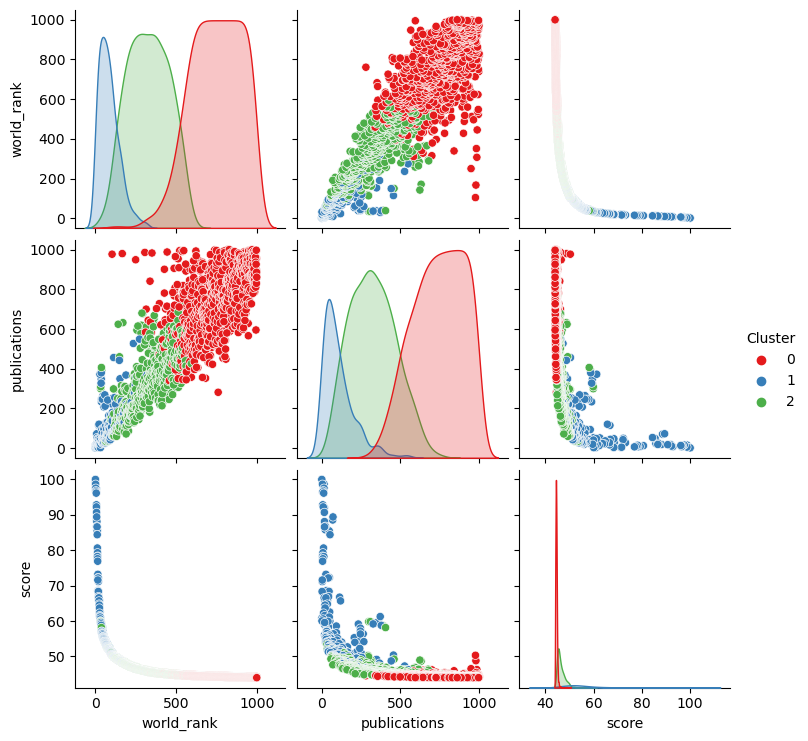

Cluster Centers:
   world_rank  national_rank  quality_of_education  alumni_employment  \
0  747.373984      53.593496            343.825203         460.989837   
1   84.434783      18.391304            100.840580         187.445652   
2  327.405405      36.789189            305.198649         358.348649   

   quality_of_faculty  publications   influence   citations  broad_impact  \
0          212.994919    742.975610  733.664634  641.341463    740.758130   
1           82.702899    106.891304   95.144928  101.956522    102.536232   
2          202.489189    324.648649  340.881081  323.598649    319.179730   

      patents      score  
0  613.560976  44.490528  
1  176.884058  57.843442  
2  389.294595  46.475392  


In [36]:
# Fit K-means model to the scaled data
kmeans.fit(scaled_df)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualize clusters using pair plot for selected features (adjust as needed)
sns.pairplot(df, vars=['world_rank', 'publications', 'score'], hue='Cluster', palette='Set1')
plt.show()

# Optional: Visualize cluster centers (mean values)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_df.columns)
print("Cluster Centers:")
print(cluster_centers)

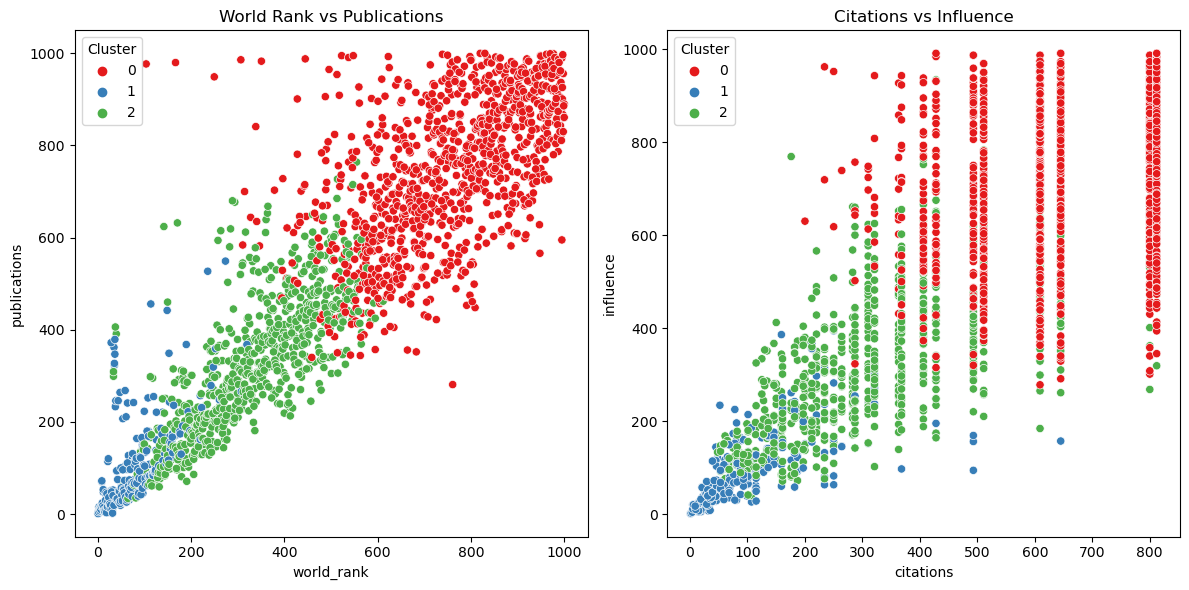

In [37]:
# Example scatterplots
plt.figure(figsize=(12, 6))

# Scatterplot: world_rank vs publications
plt.subplot(1, 2, 1)
sns.scatterplot(x='world_rank', y='publications', data=df, hue='Cluster', palette='Set1', legend='full')
plt.title('World Rank vs Publications')

# Scatterplot: citations vs influence
plt.subplot(1, 2, 2)
sns.scatterplot(x='citations', y='influence', data=df, hue='Cluster', palette='Set1', legend='full')
plt.title('Citations vs Influence')

plt.tight_layout()
plt.show()

Based on the visualizations and cluster centers derived from the K-means algorithm applied to university ranking data, here are some insights and reflections on the clusters:

## Analysis of Clusters:
Cluster Interpretation:

Cluster 0: Universities in this cluster exhibit higher rankings (world_rank) and significant research output (publications, citations, patents). They also show high scores across various metrics, indicating strong academic performance and global influence.

Cluster 1: Universities in this cluster have lower rankings (world_rank) and relatively lower research output (publications, citations, patents). However, they surprisingly show higher scores (score) compared to other clusters, suggesting they excel in other evaluated dimensions such as teaching quality (quality_of_education) or alumni employment (alumni_employment).

Cluster 2: This cluster represents universities with moderate rankings and research output. They exhibit balanced scores across different dimensions, indicating average performance across the evaluated metrics.

# Insights:

The clusters align reasonably well with expectations based on university rankings and performance metrics. Cluster 0 represents prestigious universities known for their research and global influence, while Cluster 1 captures universities with potentially unique strengths beyond research output despite lower rankings.

The existence of Cluster 1, where universities show lower rankings but higher scores, suggests that some institutions may excel in specific areas not fully captured by traditional ranking metrics. This could include teaching quality, industry partnerships, or regional influence.

# Further Exploration:

While the clusters provide valuable insights, further exploration could involve:
External Validation: Compare clusters against external benchmarks or additional datasets to validate the segmentation.
Feature Importance: Analyze which features contribute most to the clustering to understand the primary factors driving cluster formation.
Cluster Stability: Evaluate the stability of clusters using different clustering algorithms or varying the number of clusters (k) to ensure robustness.

# Conclusion:

Overall, the clusters derived from the K-means algorithm offer meaningful segmentation of universities based on their rankings and academic performance metrics. They provide a basis for deeper exploration into what distinguishes universities across different clusters and can guide further research into understanding factors influencing university excellence.
By critically analyzing and validating these clusters, researchers and policymakers can gain insights into the diverse profiles of universities and potentially uncover new dimensions of academic excellence beyond conventional metrics.

In [38]:
# Calculate descriptive statistics for each cluster
cluster_stats = df.groupby('Cluster').describe()

# Print and examine the statistics
print(cluster_stats)

        world_rank                                                    \
             count        mean    min     25%    50%     75%     max   
Cluster                                                                
0            984.0  747.373984  104.0  631.75  754.5  877.25  1000.0   
1            276.0   84.434783    1.0   36.00   72.5  118.25   320.0   
2            740.0  327.405405   34.0  227.75  326.5  426.25   612.0   

                    national_rank             ...   score             year  \
                std         count       mean  ...     max        std count   
Cluster                                       ...                            
0        156.058191         984.0  53.593496  ...   50.34   0.387814   984   
1         62.638757         276.0  18.391304  ...  100.00  12.839076   276   
2        125.963848         740.0  36.789189  ...   59.84   1.840091   740   

                                                             \
                                  m

The results from clustering universities based on performance metrics can be highly useful for several future steps in an analytics pipeline:

Targeted Interventions and Benchmarking: Understanding which universities fall into which clusters allows for targeted interventions. For example, universities in Cluster 1 (with lower ranks but potentially higher scores) might benefit from benchmarking against higher-performing universities in Cluster 0 to identify areas for improvement.

Resource Allocation: Clusters can inform resource allocation strategies. Universities in different clusters likely have varying needs and priorities. Cluster 1 universities, for instance, may require different types of support compared to those in Cluster 0 or Cluster 2.

Strategic Planning: Higher-ranked universities (Cluster 0) might use cluster insights to solidify their positions or explore ways to maintain or improve their standings. Cluster 2 universities, on the other hand, could use insights to identify growth opportunities or areas where they can enhance their rankings and performance.

Policy Formulation: Governments and policymakers can use cluster analysis to tailor policies that support universities based on their cluster characteristics. For instance, policies aimed at improving research outputs might be more relevant for universities in Clusters 0 and 2, whereas policies focused on educational quality could be more critical for universities in Cluster 1.

Predictive Analytics: Clustering can serve as a foundation for predictive modeling. By understanding the characteristics of each cluster, predictive models can be developed to forecast future trends in university rankings, scores, and other performance metrics.

Comparative Studies: Clusters facilitate comparative studies across similar universities. Researchers can delve deeper into what distinguishes universities within each cluster, identifying best practices, challenges, and factors influencing their performance.

Feedback Loop for Data Collection: Clustering results can provide feedback on the relevance and sufficiency of data collected. If certain clusters consistently exhibit high variability or unexpected patterns, it may indicate a need to refine data collection methods or include additional variables for more accurate clustering.

In summary, the clustering results can serve as a foundational element in an analytics pipeline, guiding subsequent analyses, strategic decisions, and policy formulations aimed at enhancing the performance and competitiveness of universities worldwide.